In [12]:
%matplotlib inline
import json
import dateutil.parser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import sys, os

sys.path.append('C:\\Users\\kjree\\Workspaces\\ml-fantasy-football-model\\src\\model_util')
from FantasyFootballSpecialTeams import calcCareerFantasyPointValues

kCareerDict = dict()
kStatDict = dict()
kSeasonsList = list()
kStatDf = pd.DataFrame()

#1. Get the game stats for each K for every year they have played
with open('C:\\Users\\kjree\\Workspaces\\nfl-player-stats\\games_K.json') as gf:
    games = json.load(gf)
    for game in games:
        playerid = game['player_id']
        if kCareerDict.get(playerid) is not None:
            kCareerDict[playerid].append(game)
        else:
            kCareerDict[playerid] = []

#2. Loop through K player_id's and calculate fantasy values
#3. Record the number of seasons played for lifespan study of the K position
for key in kCareerDict.keys():
    career = kCareerDict[key]
    if career is not None and len(career) > 0:
        seasons = calcCareerFantasyPointValues(career)
        if(len(seasons) > 0):
            kStatDict[key] = seasons
            kSeasonsList.append(len(seasons))

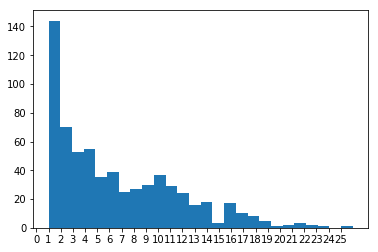

In [21]:
#4. Perform lifespan study for the K position; then comment this out.
plt.hist(kSeasonsList, bins=26)
plt.xticks(np.arange(0, 26, step=1))
plt.show()

#5. Calculate the prime age curve for the K position
#kStatDfNoFill = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in kStatDict.items()]))
#kStatDfWithFill = kStatDfNoFill.fillna(0)
#kStatDfWithFill['averageWithFill'] = kStatDfWithFill.mean(axis=1)
#kStatDfWithFill['averageNoFill'] = kStatDfNoFill.mean(axis=1)
#kStatDfWithFill['averageOverall'] = (ksStatDfWithFill['averageWithFill'] + kStatDfWithFill['averageNoFill']) / 2
#kStatDfWithFill.to_csv("C:\\Users\\kjree\\Workspaces\\ml-fantasy-football-model\\k_fantasy_values.csv", index=False, encoding='utf8')
#p7 = np.poly1d(np.polyfit(kStatDfWithFill.index, kStatDfWithFill['averageOverall'], 7))
#xp = np.linspace(0,27,100)
#plt.scatter(kStatDfWithFill.index, kStatDfWithFill['averageOverall'])
#plt.plot(xp, p7(xp), c='r')
#plt.show()

#6. Aspect B of the NFL Player Model:
# Group all K's into top 0-20%,21-40%,41-60%,61-80%, and 81-100% based on last year's fantasy values
#kLastYearStatDict = dict()
#for key in kCareerDict.keys():
#    career = kCareerDict[key]
#    if career is not None and len(career) > 0:
#        lastYear = calcPastFantasyPointValue(career, 2017)
#        if lastYear is not None:
#            kLastYearStatDict[key] = lastYear

In [48]:
#from sklearn.metrics import r2_score

#r2 = r2_score(kStatDfWithFill['averageOverall'], p7(kStatDfWithFill.index))

#print(r2)

0.98586056587
